In [26]:
import numpy as np
import random
from scipy.stats import norm, beta, triang, uniform, bernoulli

import pandas as pd

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [24]:
url = 'https://github.com/dvasiliu/AML/blob/main/Data%20Sets/PrelimData.csv?raw=true'
data = pd.read_csv(url)

In [28]:
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), [0]), # Added handle_unknown='ignore' as it's good practice
     ('num_imputer', SimpleImputer(strategy='mean'), [1, 2]),
     ('cat_imputer_and_encoder', Pipeline([ # Use a Pipeline for column 3
         ('imputer', SimpleImputer(strategy='most_frequent')),
         ('encoder', OrdinalEncoder())
     ]), [3])],
    remainder='passthrough')
datamod = np.array(ct.fit_transform(data))
datamod[:5,:]

array([[  1.,   0.,   0.,   0.,  18., 600.,   0.],
       [  1.,   0.,   0.,   0.,  18., 500.,   0.],
       [  1.,   0.,   0.,   0.,  18., 600.,   0.],
       [  0.,   0.,   1.,   0.,  23., 800.,   0.],
       [  0.,   1.,   0.,   0.,  21., 400.,   1.]])

In [23]:
# We define the machines and their rewards
def Casino(machine): # here we make a Casino with many slot machines

    if(machine == 1):
        return round(norm.rvs(loc=0,scale=1),2)

    if(machine == 2):
        return round(uniform.rvs(loc=0.1,scale=1),2)

    if(machine>=3 and machine <=10):
        return round(triang.rvs(loc=0,scale=1,c=0.5),2)

    if(machine >=11 and machine <=14):
        return round(triang.rvs(loc=0.5,scale=1,c=0.5),2)

    if(machine == 15): # this is the lucky one
        return round(triang.rvs(loc=0.8,scale=3.2,c=1/16),2)

    if(machine >= 16 and machine <= 20):
        return round(uniform.rvs(0,scale=1.25),2)

    if(machine >20):
        print("There are only 20 slot machines!")

In [84]:
# initialize our variables
balance = 200
cost = 1
N = 50
d = 20
# tracker variables
Qa = [0]*d
Na = [0]*d
machine_record = []
epsilon = 0.2
UCB = [1e100]*d

In [82]:
# the epsilon-greedy
for i in range(N):
    if np.random.uniform()>epsilon:
        play = np.argmax(Qa)      
    else:
        play = np.random.randint(d)
        
    machine_record.append(play+1)
    reward = Casino(play+1)
    balance = balance - cost + reward
    Na[play] += 1
    Qa[play] += 1/Na[play]*(reward - Qa[play])


In [85]:
# test the UCB action selection
for i in range(1,N+1):
    play = np.argmax(UCB)
    machine_record.append(play+1)
    reward = Casino(play+1)
    balance += - cost + reward
    Na[play] += 1
    Qa[play] += 1/Na[play]*(reward - Qa[play])
    UCB[play] = Qa[play] + 2*np.sqrt(np.log(i)/Na[play])

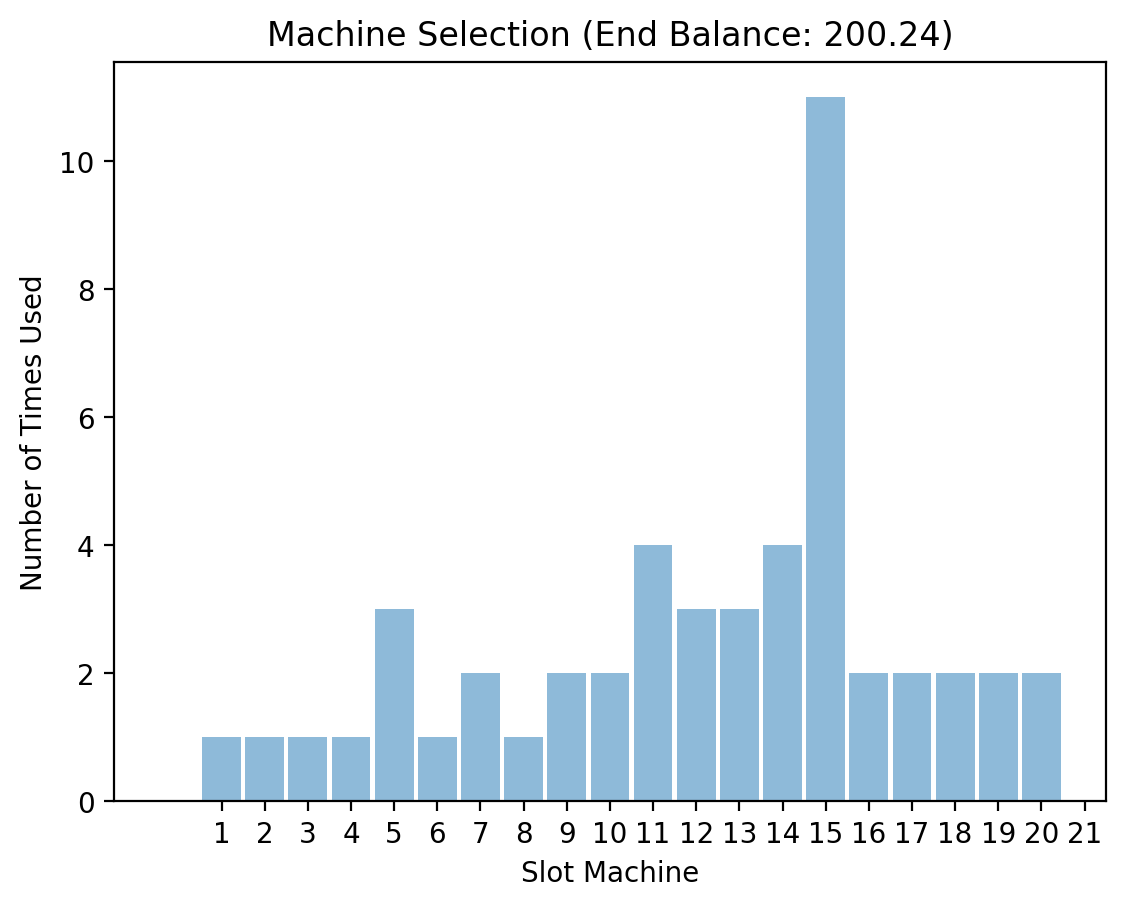

In [86]:
plt.hist(machine_record,bins=range(22),rwidth=0.9, alpha=0.5,align='left')
plt.title("Machine Selection (End Balance: "+ str(round(balance,2))+")")
plt.xlabel("Slot Machine")
plt.ylabel("Number of Times Used")
plt.xticks(np.arange(1,22,1))
plt.show()

In [37]:
Na

[7, 5, 1, 7, 2, 1, 5, 3, 4, 4, 48, 5, 5, 23, 158, 9, 3, 2, 5, 3]

In [8]:
from scipy.stats import norm, beta, t
import matplotlib.pyplot as plt

In [4]:
z = norm.ppf(0.02)

In [6]:
population = beta.rvs(size=100000,loc=2,scale=4,a=1.2,b=3.4)

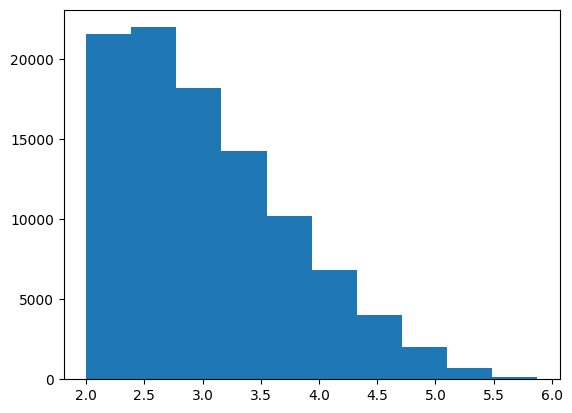

In [9]:
plt.hist(population)
plt.show()

In [21]:
sigma = np.std(population)
mu = np.mean(population)

In [13]:
n = 32
E = abs(z)*sigma/np.sqrt(n)

In [14]:
E

0.26924507660422387

In [15]:
samples = [np.random.choice(population,size=n,replace=False) for _i in range(300)]

In [16]:
sample_means = np.mean(np.array(samples),axis = 1)

In [18]:
LB = sample_means - E
UB = sample_means + E

In [22]:
sum((LB<=mu) & (mu<=UB))/300

0.9666666666666667